<a href="https://colab.research.google.com/github/Rogerio-mack/Modelos_de_Linguagem_e_Generativos/blob/main/Zipf_Law.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Luhn e Zipf Law**

A frequência de termos (quantidade que cada palavra aparece em um texto) tem grande importância em uma série de problemas envolvendo busca, classificação e sumarização automática de documentos.  

As palavras que um texto contêm e a frequencia delas pode muito bem dar uma pista do conteúdo do texto  

> Hans Peter Luhn (1957): **The weight of a term that occurs in a document is simply proportional to the term frequency**.

Entretanto parecem haver termos muito frequentes, como artigos, preposições etc. que parecem contribuir muito pouco para explicar o conteúdo de um texto.

> George Kingsley Zipf: **Zipf's law states that given a large sample of words used, the frequency of any word is inversely proportional to its rank in the frequency table. So word number n has a frequency proportional to 1/n.**

Isso ocorre em todo o texto de produção humana e, importante, em *qualquer língua*. Esse princípio é empregado desde para decifrar códigos e texto em linguas antigas, como em modernos sistemas de mineração de texto (*search engines*, bibliotecas digitais, classificação automática de conteúdo etc.).

Veja a demonstração disso aqui [Zipf's Law Applied to Word and Letter Frequencies
](https://www.wolframcloud.com/objects/demonstrations/ZipfsLawAppliedToWordAndLetterFrequencies-source.nb).

In [1]:
from IPython.display import IFrame
IFrame('https://demonstrations.wolfram.com/ZipfsLawAppliedToWordAndLetterFrequencies/', width='1000', height=600)



O exemplo mais conhecido da lei de Zipf aplica-se à tabela de frequência de palavras em um texto ou corpus de linguagem natural:

$$\text{word frequency} \propto \frac{1}{\text{word rank}}$$

Geralmente verifica-se que a palavra mais comum ocorre aproximadamente duas vezes mais que a próxima palavra comum, três vezes mais que a terceira mais comum e assim por diante. Isto é, é uma distrbuição exponencial.

O que é mais interessante é que isso é uma *lei universal* para os textos produzidos pelo ser humano, isso se aplica a qualquer texto,
um livro, uma revista ou um conjunto de páginas Web, mesmo se estiver em português, alemão, espanhol ou inglês (ao menos com a linhas que tem essa estrutura de palavras).

Por exemplo, a coleção de textos conhecida como *Brown Corpus* do inglês americano (uma grande coleção eletrônica de amostras de texto do inglês americano atual de gêneros variados), a palavra " the" é a palavra que ocorre com mais frequência. Fiel à Lei de Zipf, a palavra em segundo lugar "de" representa pouco mais de 3,5% das palavras, seguida por "e" etc. E algo semelhante vai ocorrer em uma coleção de texto do NYT ou em obras de Sheakspeare. Isso é frequentemente representado da seguinte forma, chamada lei de Zipf-Mandelbrot :

$$\text{frequency} \propto \frac{1}{(\text{rank} + b)^a}$$

O mesmo vai ocorrer com as palavras (têrmos) mais frenquentes em português, "o" "a", depois "de" etc. e o mesmo compartamento sendo encontrado em uma obra de Machado de Assis, o semanário da Folha de São Paulo ou a coleção de páginas da Wikipedia em português.



# **BOW**

Aqui extraímos a biografia da atriz **Kate Beckinsale** na Wikipedia e em seguida criamos um dicionário de termos com a quantidade de palavras.

<br>
<br>

<img src="https://meusite.mackenzie.br/rogerio/kate_beckinsale.png" width=300, align="left">

<br>
<br>
<br>
<br>


In [2]:
#@markdown **Web Scrapping, para gerar o arquivo dessa demo**
import requests
from bs4 import BeautifulSoup

url = 'https://pt.wikipedia.org/wiki/Kate_Beckinsale'

# Added User-Agent header to mimic a browser request
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
response = requests.get(url, headers=headers)


if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')

    main_content = soup.find('div', {'class': 'mw-parser-output'})

    text = []

    for paragraph in main_content.find_all(['p', 'h1', 'h2', 'h3', 'h4', 'h5', 'h6']):
        text.append(paragraph.get_text())

    for line in text:
       None
       # print(line)

else:
    print(f'Falha ao acessar a página. Response: {response.status_code}')

print(text)

['Kathrin Romany Beckinsale (Chiswick, 26 de julho de 1973) é uma atriz britânica. Depois de alguns papéis menores na televisão, ela estreou no cinema em Much Ado About Nothing (1993) enquanto ainda era estudante na Universidade de Oxford. Ela apareceu em dramas britânicos como Prince of Jutland (1994), Cold Comfort Farm (1995), Emma (1996) e The Golden Bowl (2000), além de várias produções teatrais e de rádio. Começou a procurar trabalhos cinematográficos nos Estados Unidos no final dos anos 90 e, depois de aparecer em dramas de pequena escala como The Last Days of Disco (1998) e Brokedown Palace (1999), ela teve papéis principais no drama de guerra Pearl Harbor (2001), na comédia romântica Serendipity e Tiptoes (2003). Ela seguiu aqueles com aparições em The Aviator (2004) e Click (2006).\n', "Desde que foi escalada como Selene na série de filmes Underworld (2003–2016), Beckinsale tornou-se conhecida principalmente por seu trabalho em filmes de ação, incluindo Van Helsing (2004), Whi

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer='word')
X = vectorizer.fit_transform(text)

print(vectorizer.get_feature_names_out())
print(X)
print(X.toarray())


['10' '100' '101' ... 'íntimos' 'órfã' 'única']
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3025 stored elements and shape (46, 1592)>
  Coords	Values
  (0, 921)	1
  (0, 1324)	1
  (0, 279)	1
  (0, 369)	1
  (0, 56)	1
  (0, 490)	9
  (0, 910)	1
  (0, 19)	1
  (0, 1517)	1
  (0, 247)	1
  (0, 312)	1
  (0, 506)	2
  (0, 171)	1
  (0, 1147)	2
  (0, 1026)	1
  (0, 1072)	3
  (0, 1444)	1
  (0, 585)	4
  (0, 659)	1
  (0, 1093)	3
  (0, 379)	1
  (0, 596)	4
  (0, 1060)	1
  (0, 155)	1
  (0, 136)	1
  :	:
  (41, 864)	1
  (41, 478)	1
  (41, 357)	1
  (41, 1397)	1
  (41, 360)	1
  (41, 674)	1
  (41, 174)	1
  (41, 667)	1
  (41, 718)	1
  (41, 869)	1
  (41, 3)	1
  (41, 855)	1
  (41, 408)	1
  (41, 166)	1
  (41, 947)	1
  (41, 1087)	1
  (41, 256)	1
  (41, 431)	1
  (41, 834)	1
  (41, 167)	1
  (42, 722)	1
  (43, 379)	1
  (44, 1293)	1
  (45, 956)	1
  (45, 680)	1
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [5]:
import pandas as pd
import re

df = pd.DataFrame({'term': vectorizer.get_feature_names_out(), 'count': X.toarray().sum(axis=0)})
df = df[df['term'].apply(lambda x: re.fullmatch(r'[a-zA-Z]+', x) is not None)]
df.sort_values('count',ascending=False,inplace=True)
df.reset_index(drop=True,inplace=True)
df

,term,count
0,de,231
1,em,127
2,que,88
3,beckinsale,76
4,um,68
...,...,...
1250,wahlberg,1
1251,walken,1
1252,waltz,1
1253,wardle,1


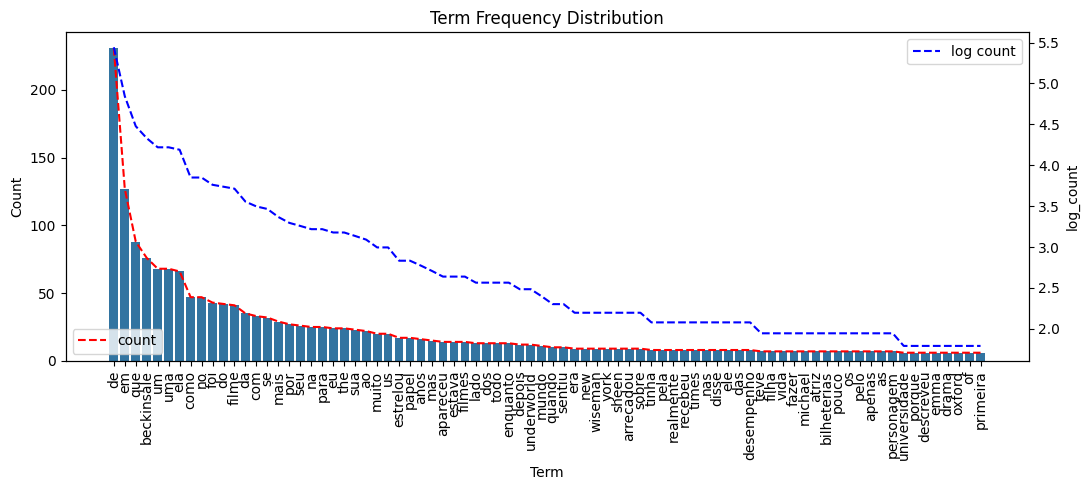

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sort the DataFrame by count in descending order for better visualization
df_sorted = df.sort_values('count', ascending=False)

# Create the plot
fig, ax = plt.subplots(1,1,figsize=(11, 5))
len = 80

sns.barplot(x='term', y='count', data=df_sorted.head(len), ax=ax) # Plotting the top len terms for clarity
sns.lineplot(x='term', y='count', data=df_sorted.head(len), label='count', color='red', linestyle='--',ax=ax)

ax2 = ax.twinx()
df_sorted['log_count'] = np.log(df['count'])
sns.lineplot(x='term', y='log_count', data=df_sorted.head(len), label='log count', color='blue', linestyle='--',ax=ax2)
# ax.set_xticks(ticks=df_sorted['term'].head(50),rotation=90)

for tick in ax.get_xticklabels():
    tick.set_rotation(90)

ax.set_xlabel('Term')
ax.set_ylabel('Count')
ax.set_title('Term Frequency Distribution')

ax.legend(loc='lower left')
ax2.legend()

plt.tight_layout()
plt.show()

# Sugestões de Arquivos Textos



In [7]:
import urllib.request  # the lib that handles the url stuff

text = []

# Dom Casmurro, Machado de Assis
# https://www.gutenberg.org/cache/epub/55752/pg55752.txt

# Moby-Dick, Hermann Melville
# https://www.gutenberg.org/files/15/15-0.txt

# Ulysses, James Joyce
# https://www.gutenberg.org/files/4300/4300-0.txt

# etc.



In [8]:
temp = [ ]

for line in urllib.request.urlopen('https://www.gutenberg.org/cache/epub/55752/pg55752.txt'):
#   print(line.decode('utf-8')) #utf-8 or iso8859-1 or whatever the page encoding scheme is
    temp.append(line.decode('utf-8'))

for line in temp:
   if line.startswith('*** START OF THE PROJECT'):
      continue
   elif line.startswith('*** END OF THE PROJECT'):
      break
   else:
      text.append(line)

for line in text:
   print(line)

﻿The Project Gutenberg eBook of Dom Casmurro

    

This ebook is for the use of anyone anywhere in the United States and

most other parts of the world at no cost and with almost no restrictions

whatsoever. You may copy it, give it away or re-use it under the terms

of the Project Gutenberg License included with this ebook or online

at www.gutenberg.org. If you are not located in the United States,

you will have to check the laws of the country where you are located

before using this eBook.



Title: Dom Casmurro



Author: Machado de Assis



Release date: October 15, 2017 [eBook #55752]

                Most recently updated: October 23, 2024



Language: Portuguese



Credits: Produced by Laura Natal Rodriguez & Marc D'Hooghe at Free

        Literature (online soon in an extended version,also linking

        to free sources for education worldwide ... MOOC's,

        educational materials,...) (Images generously made available

        by the Bibliotheca Nacional Digital Bra

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer='word')
X = vectorizer.fit_transform(text)

print(vectorizer.get_feature_names_out())
print(X)
print(X.toarray())

['00' '000' '070' ... 'éco' 'éramos' 'és']
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 57610 stored elements and shape (8737, 8980)>
  Coords	Values
  (0, 8271)	1
  (0, 6861)	1
  (0, 4501)	1
  (0, 3215)	1
  (0, 5995)	1
  (0, 3137)	1
  (0, 1530)	1
  (2, 8271)	2
  (2, 3215)	1
  (2, 5995)	1
  (2, 8279)	1
  (2, 4929)	1
  (2, 4221)	1
  (2, 8577)	1
  (2, 724)	1
  (2, 725)	1
  (2, 4690)	1
  (2, 8564)	1
  (2, 8010)	1
  (2, 662)	1
  (3, 8271)	1
  (3, 5995)	1
  (3, 662)	1
  (3, 5684)	1
  (3, 6099)	1
  :	:
  (8720, 2470)	1
  (8721, 7961)	1
  (8721, 2471)	1
  (8722, 8548)	1
  (8722, 7673)	1
  (8722, 2472)	1
  (8723, 8545)	1
  (8723, 8062)	1
  (8723, 2473)	1
  (8724, 8548)	1
  (8724, 6467)	1
  (8724, 8167)	1
  (8724, 2474)	1
  (8725, 7250)	1
  (8725, 2475)	1
  (8726, 5934)	1
  (8726, 4575)	1
  (8726, 5119)	1
  (8726, 2476)	1
  (8727, 3936)	1
  (8727, 2477)	1
  (8727, 7448)	1
  (8728, 1202)	1
  (8728, 7416)	1
  (8728, 2478)	1
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 

In [10]:
df = pd.DataFrame({'term': vectorizer.get_feature_names_out(), 'count': X.toarray().sum(axis=0)})
df = df[df['term'].apply(lambda x: re.fullmatch(r'[a-zA-Z]+', x) is not None)]
df.sort_values('count',ascending=False,inplace=True)
df.reset_index(drop=True,inplace=True)
df

,term,count
0,que,2663
1,de,1975
2,me,1034
3,se,857
4,um,793
...,...,...
7953,formado,1
7954,forjar,1
7955,zeloso,1
7956,abel,1


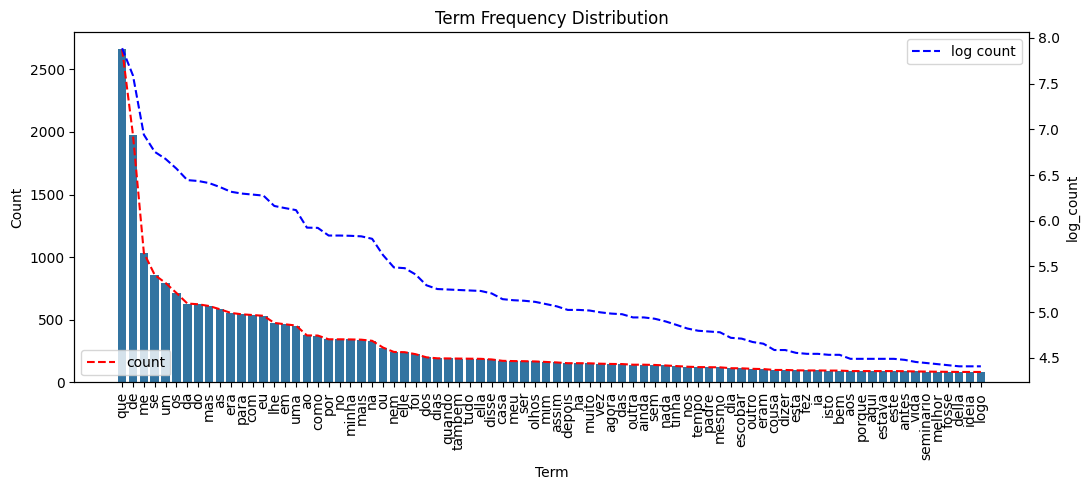

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sort the DataFrame by count in descending order for better visualization
df_sorted = df.sort_values('count', ascending=False)

# Create the plot
fig, ax = plt.subplots(1,1,figsize=(11, 5))
len = 80

sns.barplot(x='term', y='count', data=df_sorted.head(len), ax=ax) # Plotting the top len terms for clarity
sns.lineplot(x='term', y='count', data=df_sorted.head(len), label='count', color='red', linestyle='--',ax=ax)

ax2 = ax.twinx()
df_sorted['log_count'] = np.log(df['count'])
sns.lineplot(x='term', y='log_count', data=df_sorted.head(len), label='log count', color='blue', linestyle='--',ax=ax2)
# ax.set_xticks(ticks=df_sorted['term'].head(50),rotation=90)

for tick in ax.get_xticklabels():
    tick.set_rotation(90)

ax.set_xlabel('Term')
ax.set_ylabel('Count')
ax.set_title('Term Frequency Distribution')

ax.legend(loc='lower left')
ax2.legend()

plt.tight_layout()
plt.show()

# Sua vez...

Escolha um documento de sua preferência, crie o gráfico de distribuição de termos e compartilhe com seus colegas.